In [138]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

<h1 style="font-size:60px; font-weight:bold;"> Project: </h1>

# College Student Placement Analysis 

In [139]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\college_student_placement_dataset.csv")

# Data Info

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [141]:
df.shape

(10000, 10)

In [142]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


# Data Cleaning & Handling

In [143]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [144]:
df.drop(columns=["College_ID"],inplace=True)

# Machine Learning & Visualization

In [145]:
df.columns

Index(['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed', 'Placement'],
      dtype='object')

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IQ                      10000 non-null  int64  
 1   Prev_Sem_Result         10000 non-null  float64
 2   CGPA                    10000 non-null  float64
 3   Academic_Performance    10000 non-null  int64  
 4   Internship_Experience   10000 non-null  object 
 5   Extra_Curricular_Score  10000 non-null  int64  
 6   Communication_Skills    10000 non-null  int64  
 7   Projects_Completed      10000 non-null  int64  
 8   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 703.3+ KB


In [147]:
import plotly.express as px

for col in ['IQ', 'Prev_Sem_Result', 'CGPA', 'Extra_Curricular_Score',
            'Communication_Skills', 'Projects_Completed']:
    fig = px.histogram(df, x=col, nbins=30, title=f'Distribution of {col}')
    fig.show()


In [148]:
fig = px.scatter(df, x='CGPA', y='Academic_Performance', color='Placement',
                 title='CGPA vs Academic Performance by Placement')
fig.show()


In [149]:
fig = px.box(df, x='Placement', y='IQ', title='IQ Distribution by Placement')
fig.show()


In [150]:
fig = px.pie(df, names='Internship_Experience', title='Internship Experience Share')
fig.show()


In [151]:
import plotly.express as px

fig = px.violin(df, y="CGPA", x="Placement", box=True, points="all", color="Placement",
                title="CGPA Distribution by Placement", width=800, height=500)
fig.show()


In [152]:
fig = px.scatter(df, x="IQ", y="Communication_Skills",
                 size="Extra_Curricular_Score", color="Placement",
                 title="IQ vs Communication Skills colored by Placement",
                 hover_data=['Projects_Completed', 'CGPA'], width=850, height=550)
fig.show()


In [153]:
import plotly.graph_objects as go

grouped = df.groupby("Placement")[["IQ", "CGPA", "Extra_Curricular_Score",
                                   "Communication_Skills", "Projects_Completed"]].mean()

categories = grouped.columns.tolist()
fig = go.Figure()

for placement in grouped.index:
    fig.add_trace(go.Scatterpolar(
        r=grouped.loc[placement].values,
        theta=categories,
        fill='toself',
        name=placement
    ))

fig.update_layout(
    title="Personality Feature Radar by Placement",
    polar=dict(radialaxis=dict(visible=True)),
    showlegend=True
)
fig.show()


In [154]:
fig = px.parallel_coordinates(df,
                              dimensions=["IQ", "CGPA", "Communication_Skills",
                                          "Extra_Curricular_Score", "Projects_Completed"],
                              color="Academic_Performance",
                              title="Behavioral Trends Across Students")
fig.show()


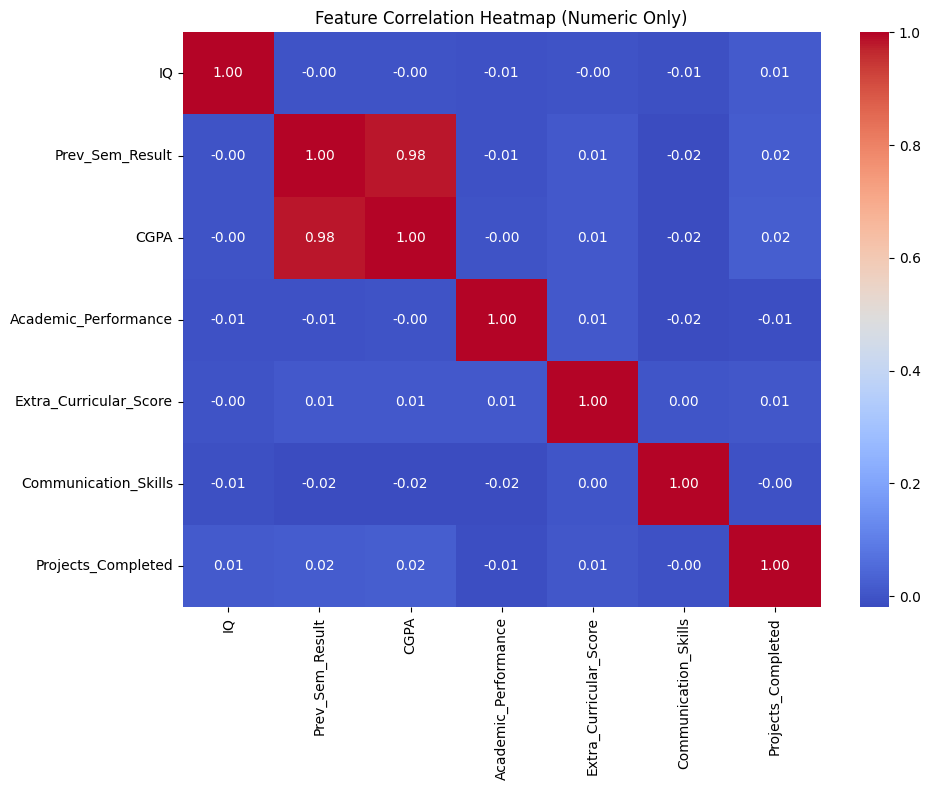

In [155]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap (Numeric Only)")
plt.tight_layout()
plt.show()


In [156]:
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Internship_Experience"] = le.fit_transform(df["Internship_Experience"])
df["Placement"] = le.fit_transform(df["Placement"])

X = df.drop(columns=['Placement'])
y = df['Placement']


# XGB Classifier Model 

In [157]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=100,         # Reduce number of trees
    max_depth=3,              # Limit tree depth
    learning_rate=0.1,        # Smaller steps
    subsample=0.8,            # Randomly sample rows
    colsample_bytree=0.8,     # Randomly sample features
    reg_alpha=0.5,            # L1 regularization
    reg_lambda=0.5            # L2 regularization
)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(classification_report(y_test, preds))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1668
           1       1.00      0.99      1.00       332

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



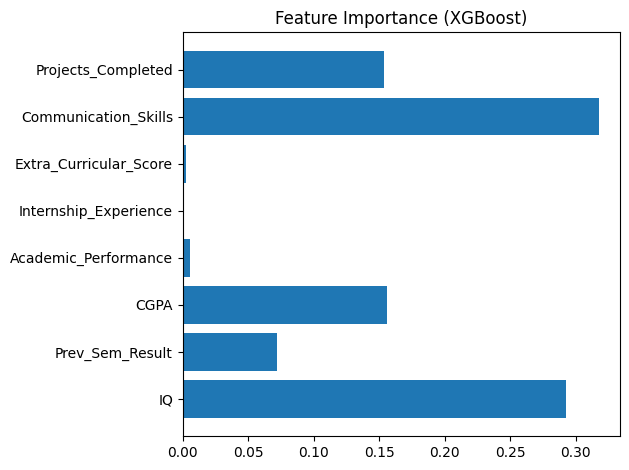

In [158]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns
plt.barh(features, importances)
plt.title('Feature Importance (XGBoost)')
plt.tight_layout()
plt.show()


In [159]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

print("Cross-Validated Accuracy:", scores.mean())


Cross-Validated Accuracy: 0.9999


# Random Forest Classifier Model

In [160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    random_state=42
)

rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("🔍 Random Forest Results:\n")
print(classification_report(y_test, rf_preds))


🔍 Random Forest Results:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1668
           1       1.00      0.82      0.90       332

    accuracy                           0.97      2000
   macro avg       0.98      0.91      0.94      2000
weighted avg       0.97      0.97      0.97      2000



# Logistic Regression Model 

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

print("🔍 Logistic Regression Results:\n")
print(classification_report(y_test, lr_preds))

🔍 Logistic Regression Results:

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1668
           1       0.78      0.58      0.67       332

    accuracy                           0.90      2000
   macro avg       0.85      0.78      0.81      2000
weighted avg       0.90      0.90      0.90      2000



# Gradient Boosting Classifier Model

In [162]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

print("🔍 Gradient Boosting Results:\n")
print(classification_report(y_test, gb_preds))


🔍 Gradient Boosting Results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1668
           1       1.00      1.00      1.00       332

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



# Comaparission Of Models

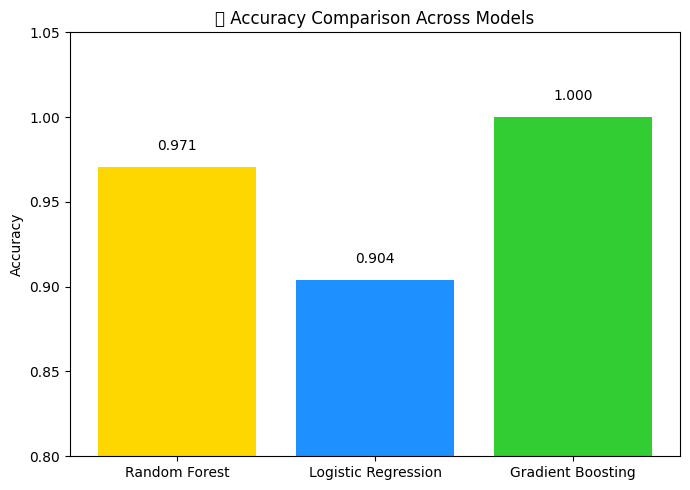

In [166]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Store model metrics
accuracies = [
    accuracy_score(y_test, rf_preds),
    accuracy_score(y_test, lr_preds),
    accuracy_score(y_test, gb_preds)
]

models = ['Random Forest', 'Logistic Regression', 'Gradient Boosting']

plt.figure(figsize=(7,5))
plt.bar(models, accuracies, color=['gold', 'dodgerblue', 'limegreen'])
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.05)
plt.title('🔍 Accuracy Comparison Across Models')
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.3f}", ha='center')
plt.tight_layout()
plt.show()


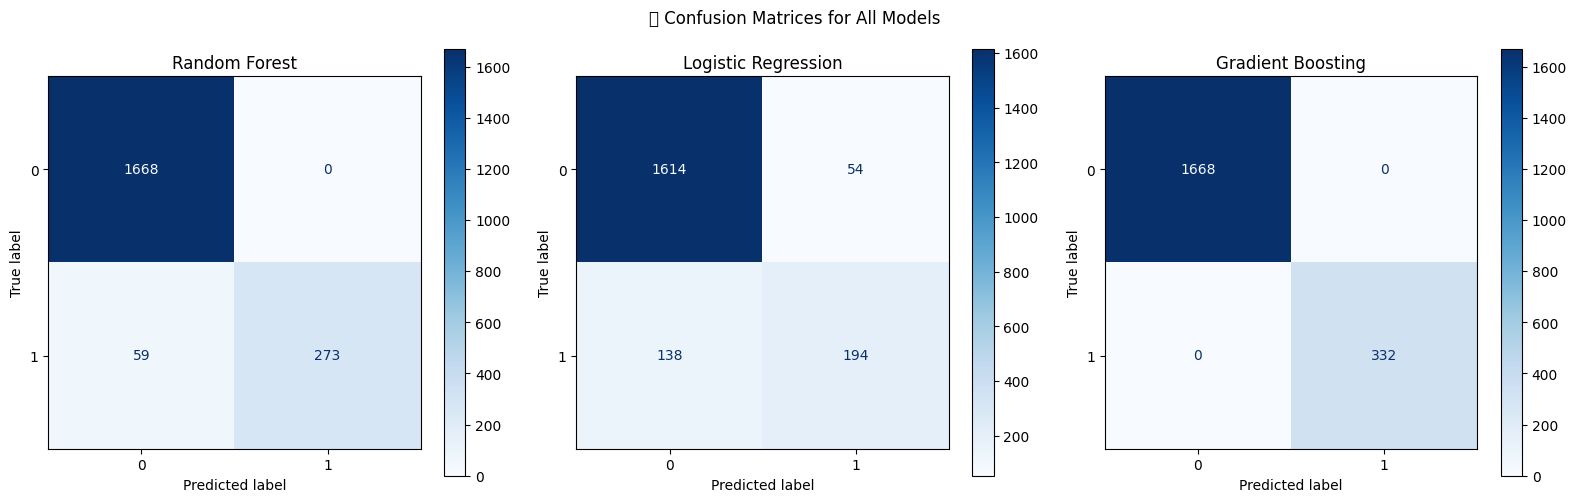

In [167]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for i, (preds, name) in enumerate(zip([rf_preds, lr_preds, gb_preds], models)):
    ConfusionMatrixDisplay.from_predictions(y_test, preds, ax=axes[i], cmap='Blues')
    axes[i].title.set_text(name)

plt.suptitle("📌 Confusion Matrices for All Models")
plt.tight_layout()
plt.show()


In [168]:
for model_name, preds in zip(models, [rf_preds, lr_preds, gb_preds]):
    print(f"\n🔬 {model_name} Classification Report:")
    print(classification_report(y_test, preds))



🔬 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1668
           1       1.00      0.82      0.90       332

    accuracy                           0.97      2000
   macro avg       0.98      0.91      0.94      2000
weighted avg       0.97      0.97      0.97      2000


🔬 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1668
           1       0.78      0.58      0.67       332

    accuracy                           0.90      2000
   macro avg       0.85      0.78      0.81      2000
weighted avg       0.90      0.90      0.90      2000


🔬 Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1668
           1       1.00      1.00      1.00       332

    accuracy                           1.00      200